In [2]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [3]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [4]:
wine = load_wine()

In [5]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [6]:
# загружаем данные в датафрейм
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data_class = wine.target

In [8]:
data.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


In [9]:
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [10]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [11]:
len(y_test)

45

In [12]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [13]:
lda = LinearDiscriminantAnalysis()

In [14]:
# обучаем модель
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [15]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 2, 2, 0, 1, 0, 2, 1, 2, 1, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 1,
       0, 1, 1, 2, 0, 1, 2, 1, 0, 0, 2, 0, 0, 1, 0, 2, 2, 1, 0, 2, 1, 1,
       2])

In [16]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [17]:
result

,0,1
0,0,0
1,2,2
2,2,2
3,0,0
4,2,1
5,0,0
6,2,2
7,1,1
8,2,2
9,1,1


In [18]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
# (наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(y_test, lda.predict(X_test))

0.9777777777777777

In [20]:
# коэффициенты дискриминатных линий
lda.coef_

array([[ 3.34180703e+00,  1.95899103e-01,  5.54665710e+00,
        -6.57195394e-01,  1.77413178e-02, -1.56795089e+00,
         4.54072704e+00,  2.17603668e+00, -1.32401671e+00,
        -7.91435631e-01,  1.68147458e+00,  3.65355339e+00,
         1.53413778e-02],
       [-2.08304156e+00, -1.02759829e+00, -5.52719529e+00,
         2.90436787e-01, -3.91241946e-03, -5.46709283e-01,
         1.76967116e+00,  3.24102693e+00,  1.44269376e+00,
        -8.04674525e-01,  1.14341612e+00, -5.54468168e-01,
        -7.57641460e-03],
       [-6.77301935e-01,  1.40907833e+00,  2.18752395e+00,
         3.23935615e-01, -1.50297103e-02,  2.75627592e+00,
        -8.28034631e+00, -7.79688709e+00, -7.19489958e-01,
         2.23720200e+00, -3.84723529e+00, -3.49711500e+00,
        -6.28739004e-03]])

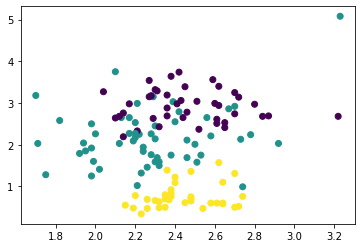

In [21]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_train['ash'], X_train['flavanoids'], c=y_train)
plt.show()

In [22]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['ash', 'flavanoids']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['ash', 'flavanoids']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

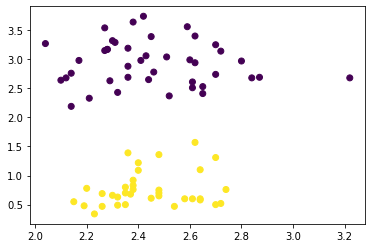

In [23]:
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)
plt.show()

In [24]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [25]:
# посмотрим на наши центроиды
lda_small.means_

array([[2.45571429, 2.93      ],
       [2.44142857, 0.76171429]])

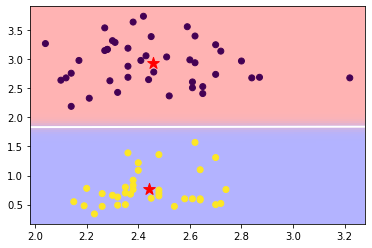

In [26]:
# сам scatter plot
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [27]:
# второй признак в 9 раз важнее первого для кластеризации (это видно по визуализации)
lda_small.coef_

array([[  0.09570035, -17.85620466]])

In [28]:
# какая будет точность?
accuracy_score(sy_test, lda_small.predict(small_test))

1.0

In [29]:
data[['flavanoids', 'ash']].corr()

,flavanoids,ash
flavanoids,1.000000,0.115077
ash,0.115077,1.000000


In [38]:
# заменим модель на логистическую регресиию
# кому интересно, отличия логистической регресссии от LDA: 
# https://www.introspective-mode.org/logistic-regression-or-discriminant-function-analysis/
# Основные моменты:
# LR может работать с категориальными признаками 
# зависимая переменная в LR подчиняется логистической функции (изменяется от 0 до 1) и непрерывна
from sklearn.linear_model import LogisticRegression

In [31]:
lr = LogisticRegression()

In [32]:
lr.fit(small_train, sy_train)

LogisticRegression()

In [33]:
lr.predict(small_test)

array([0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 0, 2, 2, 0, 2, 2])

In [34]:
accuracy_score(sy_test, lr.predict(small_test))

1.0

In [35]:
lr.coef_

array([[ 0.07062067, -3.09617493]])

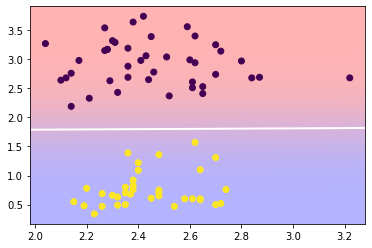

In [36]:
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

## Кластеризация

In [39]:
# генерируем искусвтенные данные для примера
from sklearn.datasets import make_moons, make_blobs

In [40]:
# 200 точек с 2 центрами, СКО - 2.5
X, y = make_blobs(n_samples=200, centers=2, cluster_std=2.5)

In [41]:
X

array([[  4.7783409 ,  -1.69579534],
       [  8.43898567,  -6.65919129],
       [  7.03909993,  -4.29859975],
       [  9.70977653,  -9.90931966],
       [  7.74190942,  -4.21614971],
       [  8.00139071,  -4.4034794 ],
       [  3.62135229,  -1.82515271],
       [  7.65931233,  -3.81579145],
       [  2.79560168,  -1.95463454],
       [  6.05002045,   1.97946641],
       [  4.17288247, -12.89611314],
       [  6.51605763,  -7.62813655],
       [  7.59605925,  -5.56465503],
       [  2.96680933,   0.52153116],
       [  5.01185657,  -6.98593299],
       [  3.68580866,  -1.70237159],
       [  2.78848376,   0.39543557],
       [  2.25345678,  -8.76821585],
       [  6.46493179,  -6.1566492 ],
       [  5.66318881,  -4.07854258],
       [  9.52400476,  -5.68733446],
       [ 10.61489345,  -6.07738485],
       [  6.88667073,  -4.45566103],
       [  1.58744606,  -4.0193745 ],
       [  5.21658591, -12.520448  ],
       [  2.64920543,  -4.69682555],
       [  3.54168649,  -6.20689867],
 

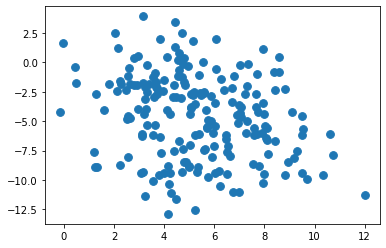

In [45]:
plt.scatter(X[:, 0], X[:, 1], cmap='autumn', s=60)

In [47]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

В реальных задачах при разделении выборки на train и test нужно обучать StandardScaler только на тренировочных данных (и применять уже к тестовым данным).


In [52]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.23300308,  0.79592341],
       [ 1.38054875, -0.58263515],
       [ 0.76350221,  0.07300742],
       [ 1.9406924 , -1.48534215],
       [ 1.07328904,  0.09590751],
       [ 1.18766411,  0.04387762],
       [-0.74298457,  0.75999504],
       [ 1.0368816 ,  0.20710503],
       [-1.10696182,  0.72403211],
       [ 0.32753229,  1.8167091 ],
       [-0.49987916, -2.3149092 ],
       [ 0.53295379, -0.85175488],
       [ 1.00900069, -0.27863314],
       [-1.03149631,  1.41177483],
       [-0.13007322, -0.67338603],
       [-0.71457327,  0.79409689],
       [-1.11009928,  1.3767524 ],
       [-1.34593034, -1.16840624],
       [ 0.51041836, -0.44305658],
       [ 0.15702328,  0.13412721],
       [ 1.85880727, -0.31270674],
       [ 2.33965301, -0.4210413 ],
       [ 0.69631393,  0.02938443],
       [-1.63949689,  0.15056085],
       [-0.03983191, -2.21057008],
       [-1.17149087, -0.03759782],
       [-0.77809994, -0.45701312],
       [-0.96587605, -0.47282793],
       [ 0.58467433,

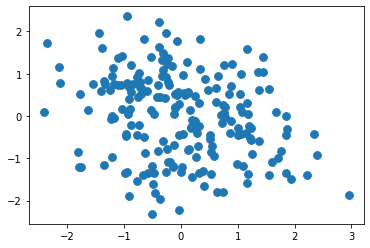

In [53]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [54]:
from sklearn.cluster import KMeans

In [55]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=2)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0])

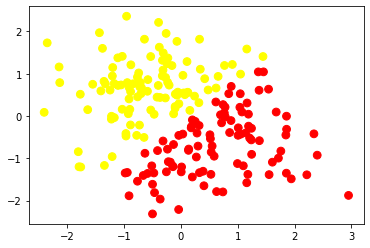

In [56]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [57]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

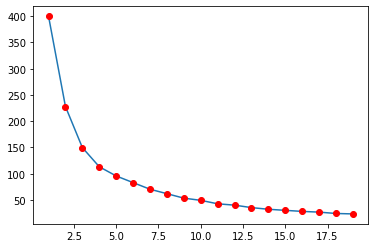

In [58]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Иерархическая кластеризация

In [59]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

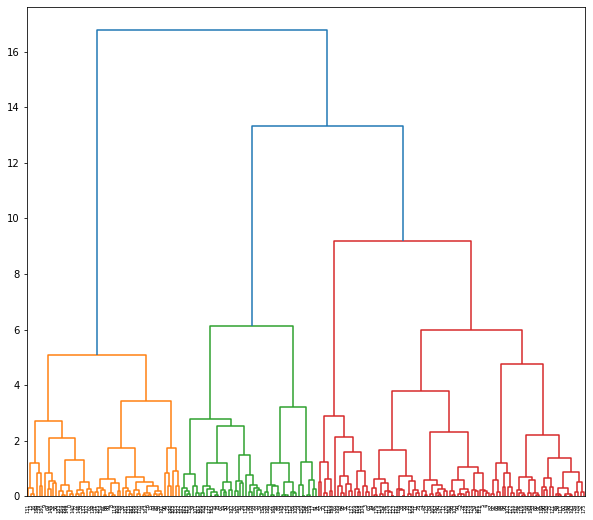

In [65]:
# строим дендрограмму
distance_mat = pdist(X_scaled) # pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward')     # расстояние Ворда
plt.figure(figsize=(10, 9))
dn = hierarchy.dendrogram(Z)

In [61]:
# делаем уже кластеризацию по факту
from sklearn.cluster import AgglomerativeClustering

In [62]:
aglo = AgglomerativeClustering(n_clusters=2)
clusters = aglo.fit_predict(X_scaled)
clusters

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0], dtype=int64)

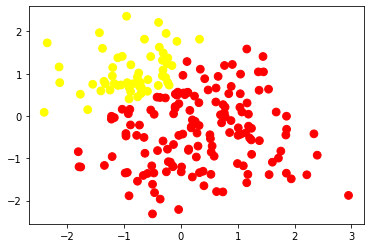

In [63]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)

In [64]:
df = pd.DataFrame(X)
df['y_hat'] = clusters
df

,0,1,y_hat
0,4.778341,-1.695795,1
1,8.438986,-6.659191,0
2,7.039100,-4.298600,0
3,9.709777,-9.909320,0
4,7.741909,-4.216150,0
...,...,...,...
195,4.981683,-8.817182,0
196,3.653212,-5.332079,0
197,4.373648,-7.502213,0
198,4.564643,-1.139684,1
